In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from wordcloud import WordCloud  
import re


In [2]:
#importamos los datasets previamente transformados
#Primero ponemos la ruta
ruta_games = r"C:\Users\Cristian\Desktop\DATA SCIENCE\HENRY\PI1\PI MLOps - STEAM\Datos Estructurados\games.parquet"
ruta_items = r"C:\Users\Cristian\Desktop\DATA SCIENCE\HENRY\PI1\PI MLOps - STEAM\Datos Estructurados\users_items.parquet"
ruta_reviews = r"C:\Users\Cristian\Desktop\DATA SCIENCE\HENRY\PI1\PI MLOps - STEAM\Datos Estructurados\df_review_final.parquet"
#luego los extraemos
games = pd.read_parquet(ruta_games)
items = pd.read_parquet(ruta_items)
reviews = pd.read_parquet(ruta_reviews)



Empezamos explorando los datos del dataset "games". Limpiamos datos, borramos duplicados, nulos y columnas innecesarias


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28733 entries, 0 to 32129
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App_Name      28733 non-null  object 
 1   Id            28733 non-null  int32  
 2   Genres        28733 non-null  object 
 3   Developer     28733 non-null  object 
 4   Publisher     28733 non-null  object 
 5   Price         28733 non-null  float64
 6   Release_Date  28715 non-null  object 
dtypes: float64(1), int32(1), object(5)
memory usage: 1.6+ MB


In [4]:
#procederemos a eliminar columnas que no sirven
games.drop(columns = ["Publisher"], inplace = True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28733 entries, 0 to 32129
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App_Name      28733 non-null  object 
 1   Id            28733 non-null  int32  
 2   Genres        28733 non-null  object 
 3   Developer     28733 non-null  object 
 4   Price         28733 non-null  float64
 5   Release_Date  28715 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 1.4+ MB


In [5]:
#Ahora veremos los duplicados
games[games.duplicated(subset="App_Name", keep=False)].sort_values(by="App_Name").head(4)

,App_Name,Id,Genres,Developer,Price,Release_Date
30175,Aliens: Colonial Marines - Reconnaissance Pack,219441,[Action],Gearbox Software,29.99,2013-05-07
30174,Aliens: Colonial Marines - Reconnaissance Pack,224850,[Action],Gearbox Software,8.13,2013-05-07
31399,Alter Ego,63110,[Adventure],bitComposer Games,9.99,2010-08-03
10910,Alter Ego,664780,"[Adventure, Casual, Indie, RPG, Simulation]",Choose Multiple LLC,7.99,1986-05-01


In [6]:
#Procedemos a ver la cantidad
num_duplicados = games.duplicated(subset="App_Name", keep=False).sum()
print(f"Número de duplicados: {num_duplicados}")


Número de duplicados: 43


In [7]:
# Procedemos a eliminarlos
games.drop_duplicates(subset="App_Name", keep="first", inplace=True)


In [8]:
#visualizamos "games"
games.head(4)

,App_Name,Id,Genres,Developer,Price,Release_Date
0,Lost Summoner Kitty,761140,"[Action, Casual, Indie, Simulation, Strategy]",Kotoshiro,4.99,2018-01-04
1,Ironbound,643980,"[Free to Play, Indie, RPG, Strategy]",Secret Level SRL,0.00,2018-01-04
2,Real Pool 3D - Poolians,670290,"[Casual, Free to Play, Indie, Simulation, Sports]",Poolians.com,0.00,2017-07-24
3,弹炸人2222,767400,"[Action, Adventure, Casual]",彼岸领域,0.99,2017-12-07


Una columna que puede contener mucha informacion util es "Price" vamos a analizarla

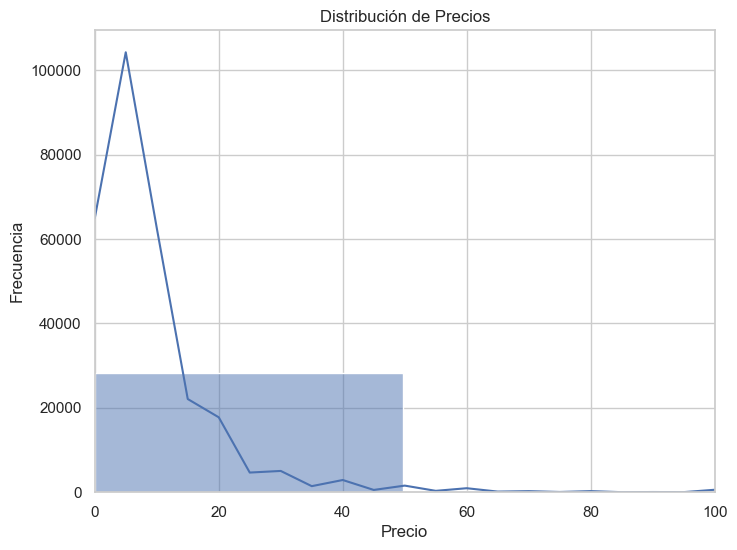

In [9]:
# Vamos a analizar la columna de precio
# Primero haremos un histograma para ver la distribucion de precios

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(games['Price'], bins=20, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.xlim(0,100)
plt.ylabel('Frecuencia')
plt.show()
print("Podemos observar como la mayor cantidad de items tienen un precio de 9.99")


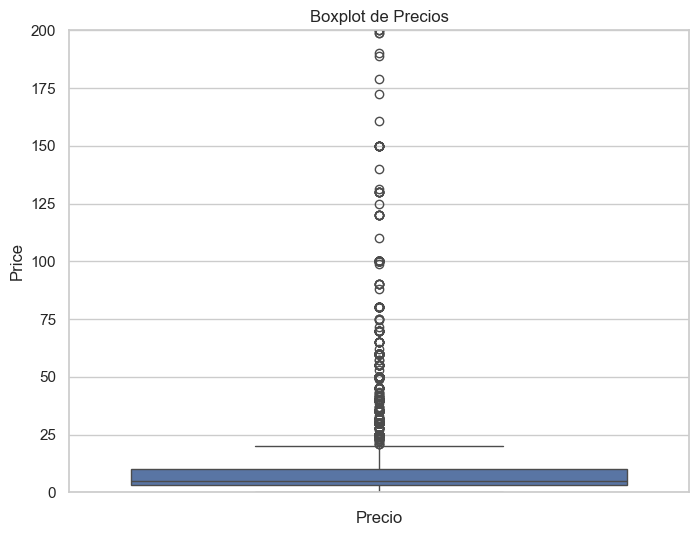

In [16]:
# Ahora haremos un boxplot para identificar outliers y la mediana
plt.figure(figsize=(8, 6))
sns.boxplot(y=games['Price'])
plt.title('Boxplot de Precios')
plt.xlabel('Precio')
plt.ylim(0,200)
plt.show()
print("Este boxplot nos ayuda a entender el comportamiento de los precios. En primer lugar, puede observarse la gran cantidad de outliers")
print("De igual manera puede apreciarse la mediana que está aproximadamente en un valor de 10$")

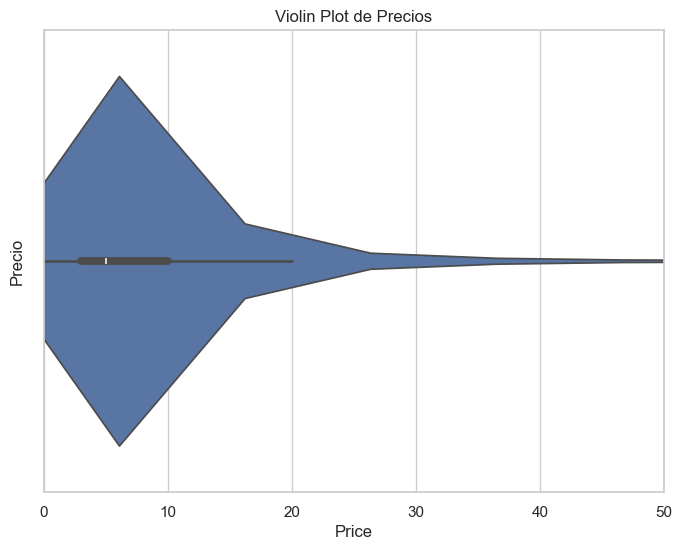

Podemos apreciar como la mas grande densidad de los datos se concentra en precios entre 6$ y 9$


In [24]:
# Ahora haremos un grafico de violin para ver la densidad de los datos


plt.figure(figsize=(8, 6))
sns.violinplot(x=games['Price']) 
plt.title('Violin Plot de Precios')
plt.ylabel('Precio')
plt.xlim(0, 50)
plt.show()

print("Podemos apreciar como la mas grande densidad de los datos se concentra en precios entre 6$ y 9$")


C:\Users\Cristian\AppData\Local\Temp\ipykernel_13252\1374505802.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Media', 'Mediana'], y=[media, mediana], palette='Blues_d')


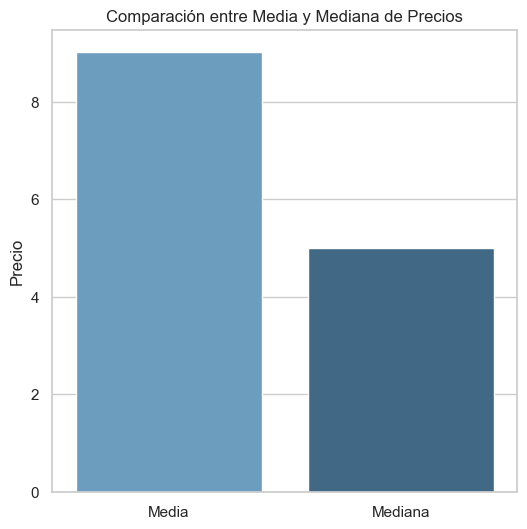

Podemos observar que la media es mas grande que la mediana. Lo cual reafirma de nuevo la gran cantidad de outliers


In [26]:
# Ahora compararemos al mediana y la media de los datos

media = games['Price'].mean()
mediana = games['Price'].median()
plt.figure(figsize=(6, 6))
sns.barplot(x=['Media', 'Mediana'], y=[media, mediana], palette='Blues_d')
plt.title('Comparación entre Media y Mediana de Precios')
plt.ylabel('Precio')
plt.show()
print("Podemos observar que la media es mas grande que la mediana. Lo cual reafirma de nuevo la gran cantidad de outliers")

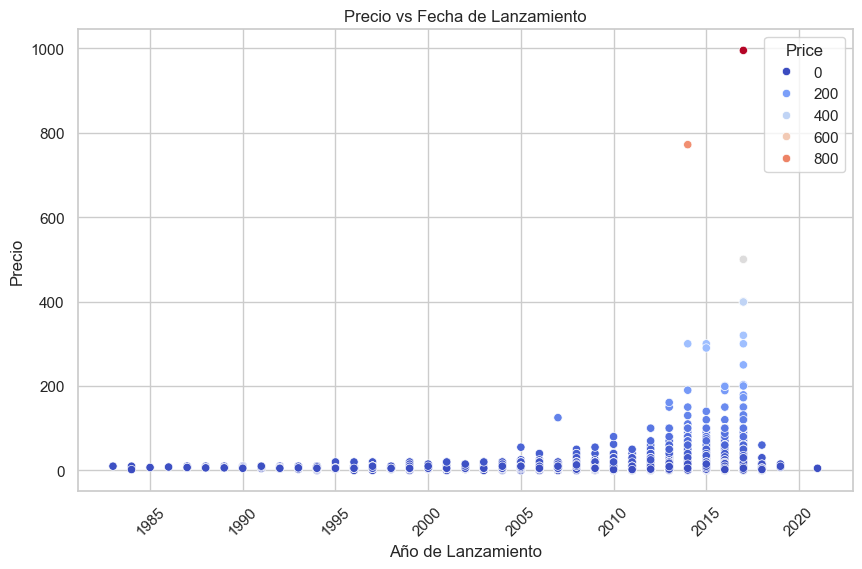

Podemos ver como durante los primeros 10 años hubo una constante en el comportamiento del precio de la variable
Despues hubo un ligero aumento. Pero desde 2005 se experimenta un drastico aumento de los precios. Y es alli tambien, donde empiezan a surgir valores atipicos (outliers)


In [30]:
# Scatter Plot para ver la relación entre el precio y la fecha de lanzamiento
games_copy = games.copy()
games_copy['Release_Date'] = pd.to_datetime(games['Release_Date'], errors="coerce")
games_copy.dropna(subset=["Release_Date"])
games_copy["Year"] = games_copy["Release_Date"].dt.year
plt.figure(figsize=(10, 6))
sns.scatterplot(x=games_copy['Year'], y=games_copy['Price'], hue=games_copy['Price'], palette='coolwarm')
plt.title('Precio vs Fecha de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()
print("Podemos ver como durante los primeros 10 años hubo una constante en el comportamiento del precio de la variable")
print("Despues hubo un ligero aumento. Pero desde 2005 se experimenta un drastico aumento de los precios. Y es alli tambien, donde empiezan a surgir valores atipicos (outliers)")

Ahora procederemos con la columna "Genres". Examinaremos su comportamiento

In [9]:
#Generos mas populares
genres_explode = games["Genres"].explode()
top_5 = genres_explode.value_counts().head(5)
porcentaje = {}
for genre_name, genre_count in top_5.items():
    porc = round(genre_count / genres_explode.value_counts().sum() * 100, 2)
    porcentaje[genre_name] = f"{porc}%"
    
print("Ranking de los 5 generos mas populares en la plataforma Steam", top_5)
print("Porcentaje del Ranking: ", porcentaje)

Ranking de los 5 generos mas populares en la plataforma Steam Genres
Indie        15811
Action       11255
Casual        8262
Adventure     8212
Strategy      6926
Name: count, dtype: int64
Porcentaje del Ranking:  {'Indie': '22.19%', 'Action': '15.79%', 'Casual': '11.59%', 'Adventure': '11.52%', 'Strategy': '9.72%'}


C:\Users\Cristian\AppData\Local\Temp\ipykernel_7280\3139111179.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = top_5.index, y = porcentajes.values, ax=ax1, palette=colors)


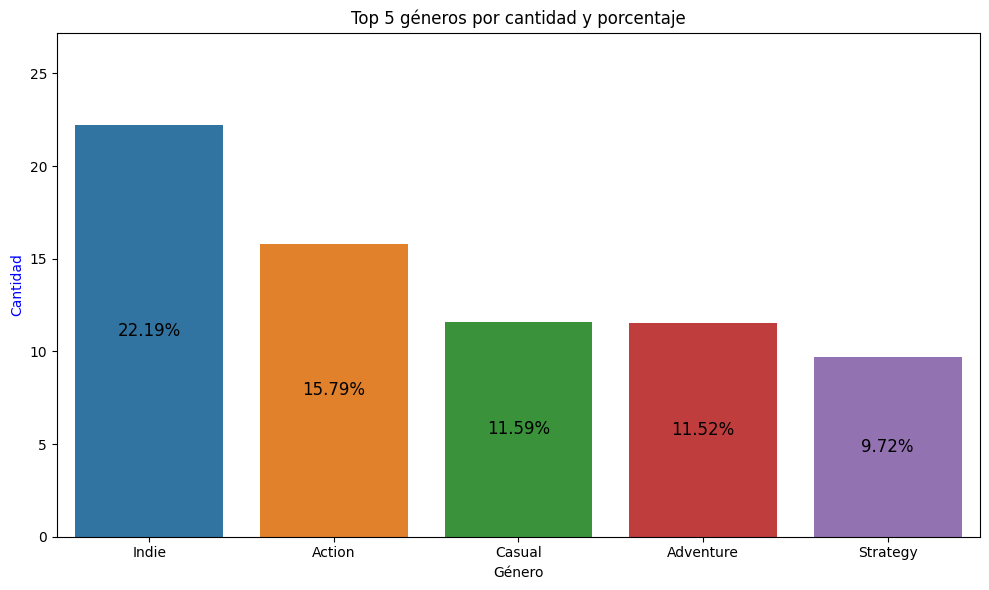

In [10]:
#Grafico de los generos mas populares

# Primero definimos variables
total_genres = genres_explode.value_counts().sum()
porcentajes = top_5.apply(lambda x: round((x / total_genres) * 100, 2))

fig, ax1 = plt.subplots(figsize=(10, 6))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Gráfico de barras para la cantidad
ax = sns.barplot(x = top_5.index, y = porcentajes.values, ax=ax1, palette=colors)

for p, porc in zip(ax.patches, porcentajes.values):
    ax.annotate(f'{porc}%', 
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center',  
                color='black', fontsize=12)  

ax1.set_xlabel('Género')
ax1.set_ylabel('Cantidad', color='b')
ax1.set_ylim(0, porcentajes.max() + 5)

ax1.set_title('Top 5 géneros por cantidad y porcentaje')

plt.tight_layout()
plt.show()

In [11]:
tail_5 = genres_explode.value_counts().tail(5)
porcentaje_tail = {}
for genre_name, genre_count in tail_5.items():
    porc = round(genre_count / genres_explode.value_counts().sum() * 100, 2)
    porcentaje_tail[genre_name] = f"{porc}%"
    
print("Ranking de los 5 generos menos populares en la plataforma Steam", tail_5)
print("Porcentaje del Ranking: ", porcentaje_tail)

Ranking de los 5 generos menos populares en la plataforma Steam Genres
Video Production     112
Software Training    101
Audio Production      88
Photo Editing         77
Accounting             7
Name: count, dtype: int64
Porcentaje del Ranking:  {'Video Production': '0.16%', 'Software Training': '0.14%', 'Audio Production': '0.12%', 'Photo Editing': '0.11%', 'Accounting': '0.01%'}


C:\Users\Cristian\AppData\Local\Temp\ipykernel_7280\2519187141.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = tail_5.index, y = porcentajes_tail.values, ax = ax1, palette=colors)


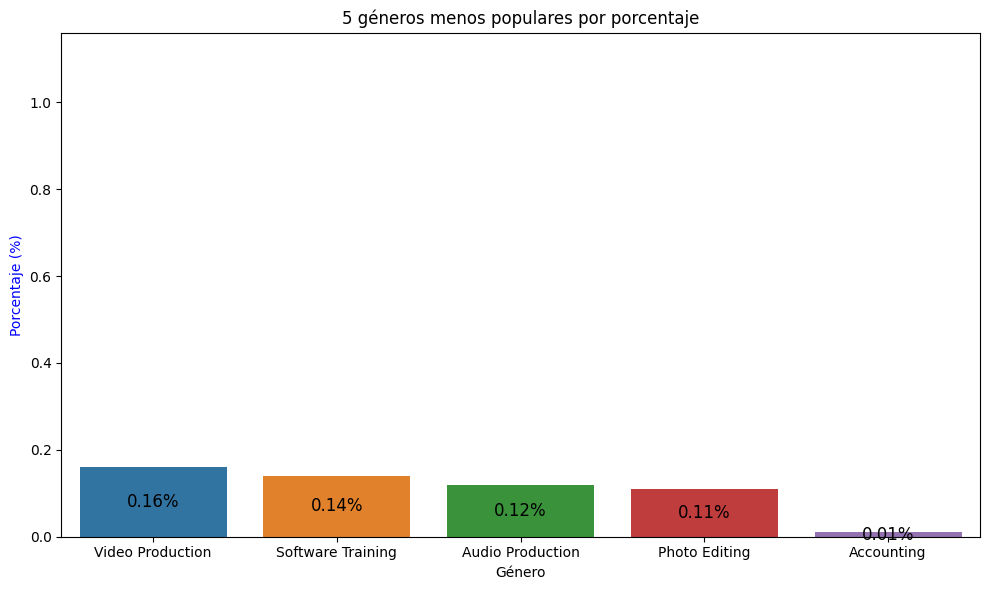

In [12]:
# Grafico de los generos menos populares
# Primero definimos variables
porcentajes_tail = tail_5.apply(lambda x: round((x / total_genres) * 100, 2))

fig, ax1 = plt.subplots(figsize=(10, 6))


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Gráfico de barras para el porcentaje
ax = sns.barplot(x = tail_5.index, y = porcentajes_tail.values, ax = ax1, palette=colors)


for p, porc in zip(ax.patches, porcentajes_tail.values):
    ax.annotate(f'{porc}%', 
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center',  
                color='black', fontsize=12)  


ax1.set_xlabel('Género')
ax1.set_ylabel('Porcentaje (%)', color='b')
ax1.set_ylim(0, porcentajes_tail.max() + 1)  

ax1.set_title('5 géneros menos populares por porcentaje')

plt.tight_layout()
plt.show()

Developer
Ubisoft - San Francisco       1259
SmiteWorks USA, LLC            813
Dovetail Games                 253
KOEI TECMO GAMES CO., LTD.     232
Paradox Development Studio     156
Name: count, dtype: int64


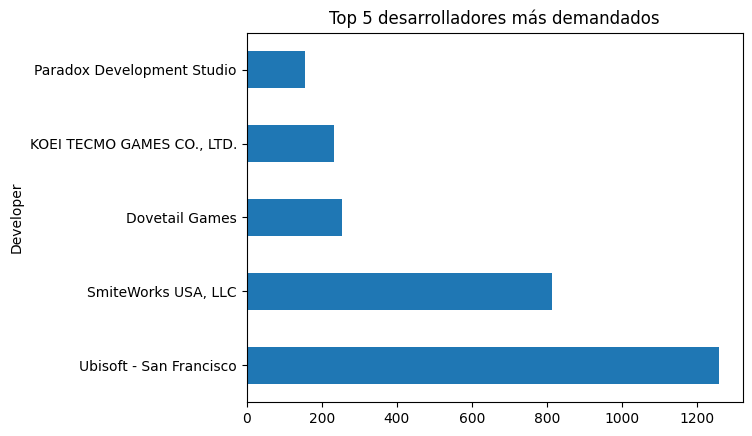

In [13]:
# TOP 5 desarrolladores más demandados
print(games.Developer.value_counts().head(5))
games.Developer.value_counts().head(5).plot.barh()
plt.title('Top 5 desarrolladores más demandados')
plt.show()

C:\Users\Cristian\AppData\Local\Temp\ipykernel_7280\1862181581.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Genero', y='Numero de Juegos', data=df_top_five, palette = 'viridis')


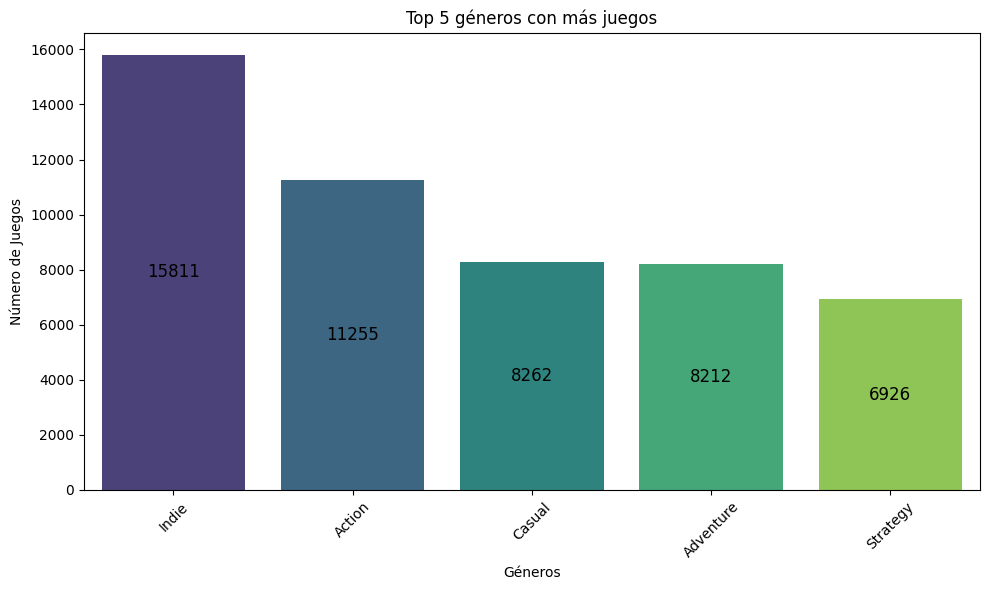

In [14]:
#Ahora veremos la cantidad de juegos por genero.
games_expanded = games.explode("Genres")
grouped = games_expanded.groupby("Genres")["App_Name"].apply(list).reset_index()
grouped.columns = ['Genre', 'App_Names']
#grouped.head(5)
games_by_g = {}
for index, row in grouped.iterrows():
    genre = row['Genre']  # Obtener el género de la fila actual
    cantidad = len(row['App_Names'])  # Contar el número de juegos en la lista de App_Names
    games_by_g[genre] = cantidad  # Almacenar el conteo en el diccionario
org_games_by_g = dict(sorted(games_by_g.items(), key=lambda item: item[1], reverse=True))
#Preparamos los datos para graficar los generos con mas juegos y su cantidad
top_Five_genres = dict(list(org_games_by_g.items())[:5])
#lo convertimos en DataFrame
df_top_five = pd.DataFrame(top_Five_genres.items(), columns = ["Genero", "Numero de Juegos"])
#Ahora graifcamos

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Genero', y='Numero de Juegos', data=df_top_five, palette = 'viridis')
plt.title('Top 5 géneros con más juegos')
plt.xlabel('Géneros')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45)  
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center',  
                color='black', fontsize=12)  
plt.tight_layout()  
plt.show()

C:\Users\Cristian\AppData\Local\Temp\ipykernel_7280\414080020.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = "Genero", y = "Precio Promedio", data = top_5_price, palette = "viridis")


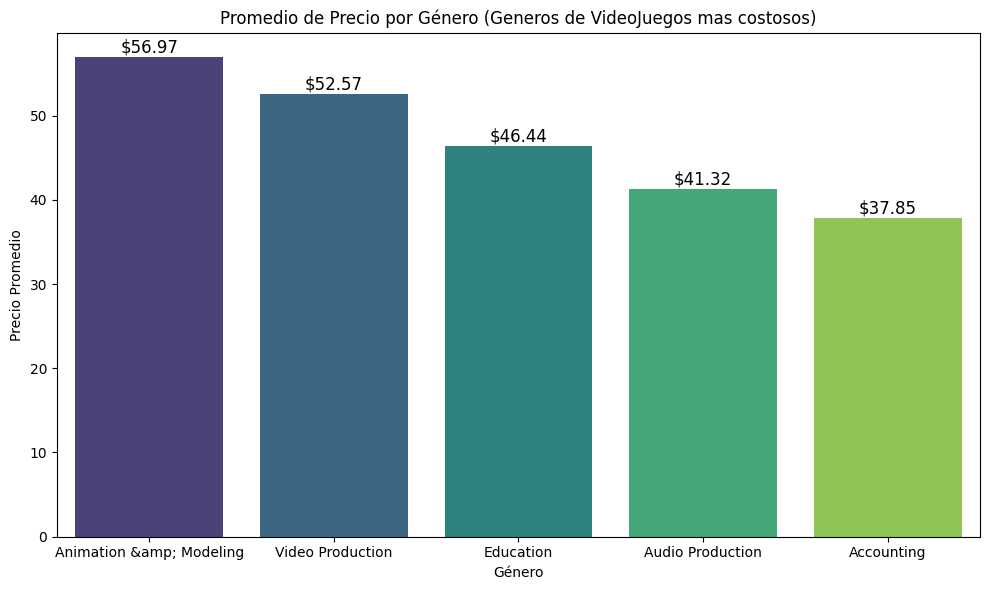

In [15]:
# Promedio de precio agrupado por género
group_mean = games_expanded.groupby("Genres")["Price"].mean().round(2).reset_index()
# Cambiamos el nombre de las columnas
group_mean.columns = ["Genero", "Precio Promedio"]
# Ordenamos el DataFrame por Precio Promedio de mayor a menor
org_group_mean = group_mean.sort_values(by='Precio Promedio', ascending=False).reset_index()
top_5_price = org_group_mean.head(5)
#org_group_mean.head(5)
#Procedemos a graficar
plt.figure(figsize = (10,6))
ax = sns.barplot(x = "Genero", y = "Precio Promedio", data = top_5_price, palette = "viridis")
plt.title("Promedio de Precio por Género (Generos de VideoJuegos mas costosos)")
plt.xlabel("Género")
plt.ylabel("Precio Promedio")
for p in ax.patches:
    ax.annotate(f'${p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='bottom', 
                fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Cristian\AppData\Local\Temp\ipykernel_7280\1654125443.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = "Genero", y = "Precio Promedio", data = tail_5_price, palette = "viridis")


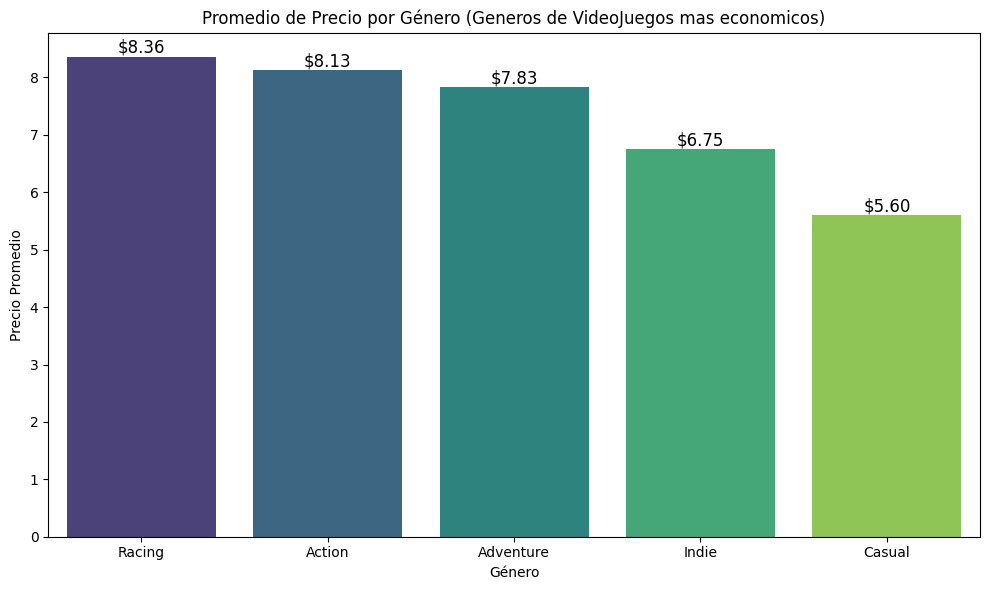

In [16]:
#Ahora procederemos a ver los 5 generos mas economicos
tail_5_price = org_group_mean.tail(5)
#org_group_mean.head(5)
#Procedemos a graficar
plt.figure(figsize = (10,6))
ax = sns.barplot(x = "Genero", y = "Precio Promedio", data = tail_5_price, palette = "viridis")
plt.title("Promedio de Precio por Género (Generos de VideoJuegos mas economicos)")
plt.xlabel("Género")
plt.ylabel("Precio Promedio")
for p in ax.patches:
    ax.annotate(f'${p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='bottom', 
                fontsize=12)
plt.tight_layout()
plt.show()

In [17]:
#Se puede ver que hay elementos en comun entre los generos mas populares y los generos mas economicos
# Comprobemos qué elementos de 'top_5' están en 'tail_5_price'
shared_elements = top_5[top_5.index.isin(tail_5_price['Genero'])]

# Mostrar los elementos compartidos
print("Elementos compartidos entre top_5 y tail_5_price:")
print(shared_elements)
print("IMPORTANTE: Podemos ver que hay 4 elementos en común, lo cual indica que un factor clave que puede influir \n"
      "en la popularidad de un videojuego es su accesibilidad financiera")


Elementos compartidos entre top_5 y tail_5_price:
Genres
Indie        15811
Action       11255
Casual        8262
Adventure     8212
Name: count, dtype: int64
IMPORTANTE: Podemos ver que hay 4 elementos en común, lo cual indica que un factor clave que puede influir 
en la popularidad de un videojuego es su accesibilidad financiera


Debido a este descubrimiento dirigermos nuestra atencion a los videojuegos. Para entender su comportamiento y asi, poder obtener informacion relevante

In [18]:
# Asegurarnos de que la columna 'Release_Date' esté en formato datetime
games['Release_Date'] = pd.to_datetime(games['Release_Date'], errors='coerce')

# Eliminamos las filas donde 'Release_Date' es NaT (datos no válidos)
games_cleaned = games.dropna(subset=['Release_Date'])

# Extraemos el año de la fecha de lanzamiento
games_cleaned['Year'] = games_cleaned['Release_Date'].dt.year

# Convertimos 'Price' a numérico (en caso de que esté como cadena)
games_cleaned['Price'] = pd.to_numeric(games_cleaned['Price'], errors='coerce')

# Agrupar por año y obtener el índice del videojuego con el precio máximo
top_5_games_per_year = games_cleaned.loc[games_cleaned.groupby('Year')['Price'].idxmax()]

# Ordenamos el DataFrame por 'Year' en orden ascendente
top_5_games_per_year = top_5_games_per_year.sort_values(by='Year')

# Eliminamos columnas innecesarias
columnas_eliminar = ["Id", "Genres", "Developer", "Release_Date"]
top_5_games_per_year = top_5_games_per_year.drop(columns=columnas_eliminar).reset_index(drop = True)

# Mostrar el resultado
top_5_games_per_year.head(5)

C:\Users\Cristian\AppData\Local\Temp\ipykernel_7280\1847174342.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_cleaned['Year'] = games_cleaned['Release_Date'].dt.year
C:\Users\Cristian\AppData\Local\Temp\ipykernel_7280\1847174342.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_cleaned['Price'] = pd.to_numeric(games_cleaned['Price'], errors='coerce')


,App_Name,Price,Year
0,Dragon's Lair,9.99,1983
1,Space Ace,9.99,1984
2,Silent Service,6.99,1985
3,Alter Ego,7.99,1986
4,Police Quest™ Collection,9.99,1987


C:\Users\Cristian\AppData\Local\Temp\ipykernel_7280\4159780363.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='App_Name', y='Price', data = top_5_games_per_year, palette='viridis', ax=ax1)
C:\Users\Cristian\AppData\Local\Temp\ipykernel_7280\4159780363.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_5_games_per_year['App_Name'], rotation=45)  # Rotar los nombres de los juegos


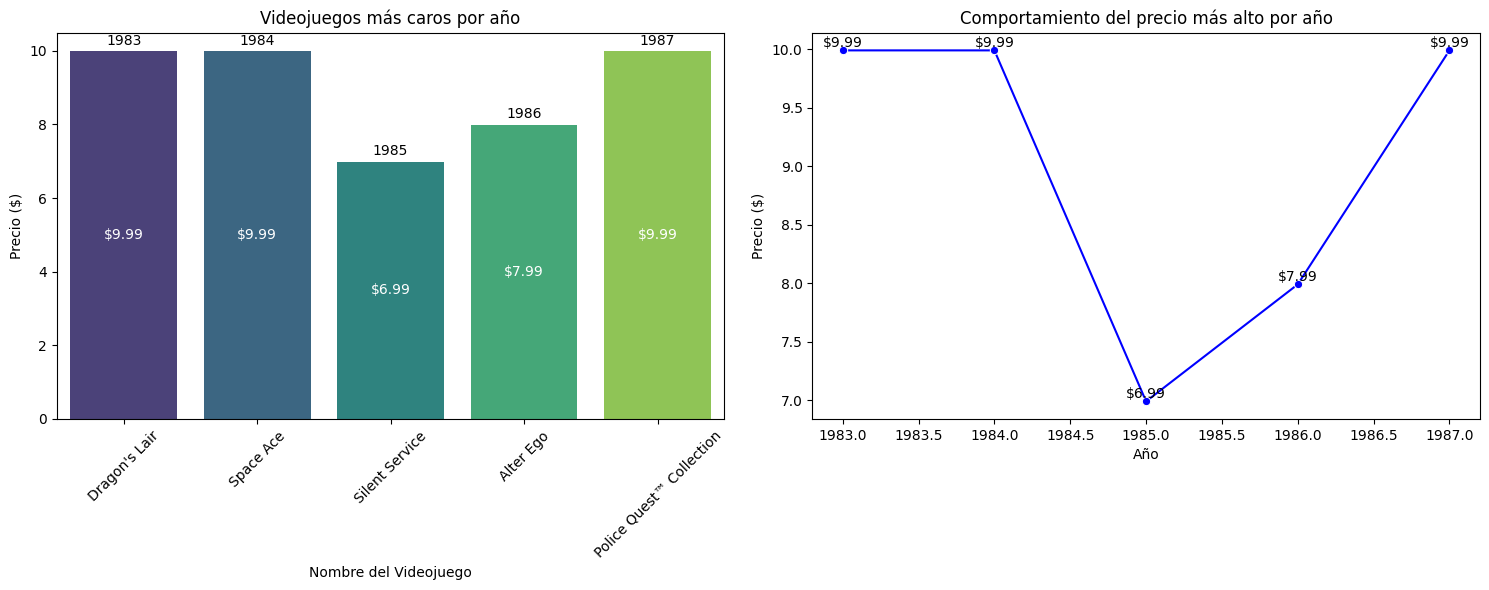

Se puede inferir que en los años 1985 y 1986 el precio de los videojuegos de la plataforma STEAM sufrio una caida considerable 
Disminucion de 33.2%
Despues de esto volvio a su normalidad


In [19]:
#Ahora graficamos

top_5_games_per_year = pd.DataFrame(top_5_games_per_year.head(5))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

bar_plot = sns.barplot(x='App_Name', y='Price', data = top_5_games_per_year, palette='viridis', ax=ax1)

for index, row in top_5_games_per_year.iterrows():
    bar_plot.text(index, row['Price'] / 2, f"${row['Price']}", 
                  color='white', ha='center', va='center')
    bar_plot.text(index, row['Price'] + 0.1, str(row['Year']), 
                  color='black', ha='center', va='bottom')

ax1.set_title('Videojuegos más caros por año')
ax1.set_xlabel('Nombre del Videojuego')
ax1.set_ylabel('Precio ($)')
ax1.set_xticklabels(top_5_games_per_year['App_Name'], rotation=45)  

line_plot = sns.lineplot(x='Year', y='Price', data=top_5_games_per_year, marker='o', ax=ax2, color='blue')

for index, row in top_5_games_per_year.iterrows():
    line_plot.text(row['Year'], row['Price'], f"${row['Price']}", 
                   color='black', ha='center', va='bottom')

ax2.set_title('Comportamiento del precio más alto por año')
ax2.set_xlabel('Año')
ax2.set_ylabel('Precio ($)')

plt.tight_layout()

plt.show()

print("Se puede inferir que en los años 1985 y 1986 el precio de los videojuegos de la plataforma STEAM sufrio una caida considerable ")
print(f"Disminucion de {((9.99-7.5)/7.5)*100}%")
print("Despues de esto volvio a su normalidad")

Ahora veremos la porcentaje de aceptacion de la plataforma

C:\Users\Cristian\AppData\Local\Temp\ipykernel_7280\3615063099.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Prop_T = round(Num_T[0]*100,2)
C:\Users\Cristian\AppData\Local\Temp\ipykernel_7280\3615063099.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Prop_F = round(Num_T[1]*100,2)
C:\Users\Cristian\AppData\Local\Temp\ipykernel_7280\3615063099.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Recomendación', y='Porcentaje', data = df, palette='virid

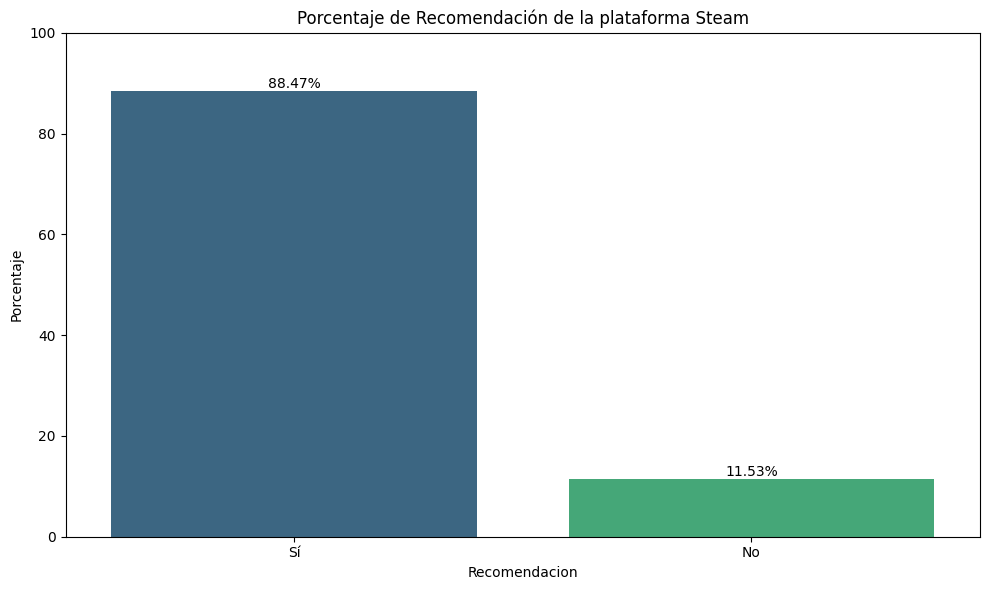

Se puede evidenciar que una considerable mayoria de usuarios recomienda la plataforma.
Se puede inferir que la plataforma tiene una alta tasa de aceptación.


In [20]:
#Vamos a ver el nivel de aceptacion de la plataforma (cuantos usuarios recomiendan vs cuantos no recomiendan)
#reviews.head(3)
# Proporción de valores True
Num_T = reviews["Recommend"].value_counts(normalize=True)  # True y False
# Proporción de valores False
Prop_T = round(Num_T[0]*100,2)
Prop_F = round(Num_T[1]*100,2)
#print(f"{Prop_T}%")
#print(f"{Prop_F}%")
data = {
    'Recomendación': ['Sí', 'No'],
    'Porcentaje': [Prop_T, Prop_F]
}
df = pd.DataFrame(data)
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Recomendación', y='Porcentaje', data = df, palette='viridis')
for p in ax.patches:
    ax.annotate(f"{p.get_height()}%", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.title("Porcentaje de Recomendación de la plataforma Steam")
plt.xlabel("Recomendacion")
plt.ylabel("Porcentaje")
plt.ylim(0,100)
plt.tight_layout()
plt.show()
print("Se puede evidenciar que una considerable mayoria de usuarios recomienda la plataforma.")
print("Se puede inferir que la plataforma tiene una alta tasa de aceptación.")

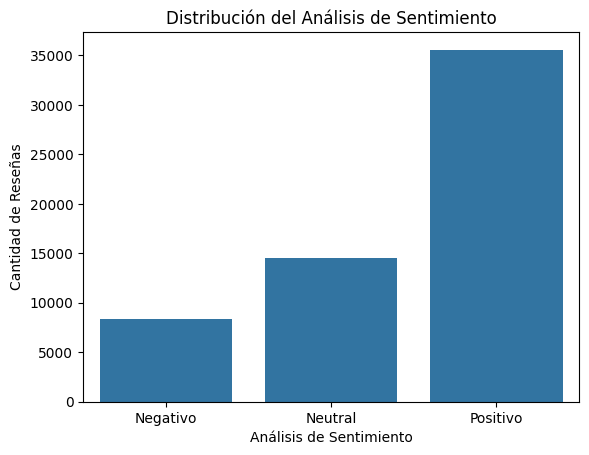

Gracias al grafico puede concluirse que la percepcion de los usuarios frente a la plataforma, en su mayoria, es positiva


In [21]:
# Analizamos la distribución del Análisis de Sentimiento:
sentiment_counts = reviews['Analisis_Sentimiento'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribución del Análisis de Sentimiento')
plt.xlabel('Análisis de Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.xticks([0, 1, 2], ['Negativo', 'Neutral', 'Positivo']) 
plt.show()
print("Gracias al grafico puede concluirse que la percepcion de los usuarios frente a la plataforma, en su mayoria, es positiva")

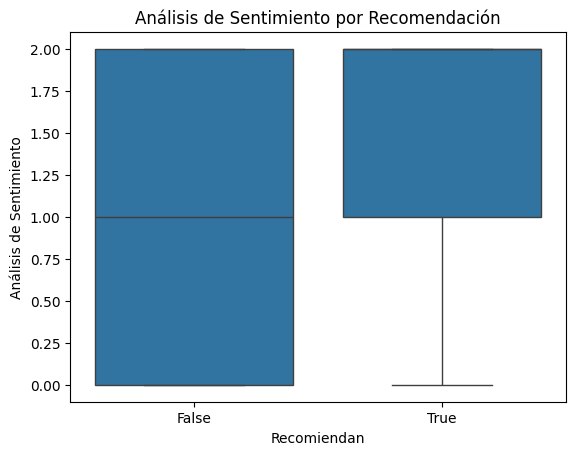

Se puede concluir que: 
Los usuarios que recomiendan un juego en Steam expresan, en general, una mayor satisfacción con el producto.
Sin embargo, es importante destacar que la experiencia de cada jugador es única y que las razones detrás de una recomendación o no recomendación pueden ser muy variadas.
Esto se evidencia en que la mediana del análisis de sentimiento para el grupo que recomeinda se encuentra por encima del valor 1.


In [22]:
# Análisis de Sentimiento por Recomendación:
# Eliminamos las filas donde 'Analisis_Sentimiento' o 'Recommend' son nulos
reviews_1 = reviews.dropna(subset=['Analisis_Sentimiento', 'Recommend'])
# Análisis de Sentimiento por Recomendación:
sns.boxplot(x='Recommend', y='Analisis_Sentimiento', data = reviews_1)
plt.title('Análisis de Sentimiento por Recomendación')
plt.xlabel('Recomiendan')
plt.ylabel('Análisis de Sentimiento')
plt.show()
print("Se puede concluir que: ")
print("Los usuarios que recomiendan un juego en Steam expresan, en general, una mayor satisfacción con el producto.")
print("Sin embargo, es importante destacar que la experiencia de cada jugador es única y que las razones detrás de una recomendación o no recomendación pueden ser muy variadas.")
print("Esto se evidencia en que la mediana del análisis de sentimiento para el grupo que recomeinda se encuentra por encima del valor 1.")

In [23]:
#Top de juegos mas recomendados (unir con games)
games.head(2)
#Top desarrolladores mas recomendados

,App_Name,Id,Genres,Developer,Price,Release_Date
0,Lost Summoner Kitty,761140,"[Action, Casual, Indie, Simulation, Strategy]",Kotoshiro,4.99,2018-01-04
1,Ironbound,643980,"[Free to Play, Indie, RPG, Strategy]",Secret Level SRL,0.00,2018-01-04


In [24]:
#Grafica de Top 5 de juegos con mejor recomendación

#Primero debemos unir los dos datasets Games y Reviews. La columna en comun es Id e Item_Id
reviews_copy = reviews.copy() #Hacemos una copia del dataset
games_copy = games.copy() #Hacemos una copia del dataset
reviews_copy["Item_Id"] = reviews_copy["Item_Id"].fillna(0).astype("int64") #Convertimos las columnas a tipo Int y llenamos valores nulos con 0
games_copy["Id"] = games_copy["Id"].fillna(0).astype("int64") #Convertimos las columnas a tipo Int y llenamos valores nulos con 0
games_reviews = pd.merge(reviews_copy, games_copy, how ='inner', left_on ='Item_Id', right_on ='Id') #Unimos los datasets
games_reviews["Year"] = games_reviews.Release_Date.dt.year #Agregamos la columna de Año
games_reviews.drop(columns = ["Release_Date"], inplace = True) #Eliminamos esta columna ya que no es necesaria
games_reviews.head(3)


,User_Id,Item_Id,Recommend,Analisis_Sentimiento,App_Name,Id,Genres,Developer,Price,Year
0,76561197970982479,1250,True,2,Killing Floor,1250,[Action],Tripwire Interactive,19.99,2009.0
1,76561197970982479,22200,True,2,Zeno Clash,22200,"[Action, Indie]",ACE Team,9.99,2009.0
2,js41637,227300,True,2,Euro Truck Simulator 2,227300,"[Indie, Simulation]",SCS Software,19.99,2013.0


Text(0.5, 1.0, 'Top 5 Juegos por Recomendación')

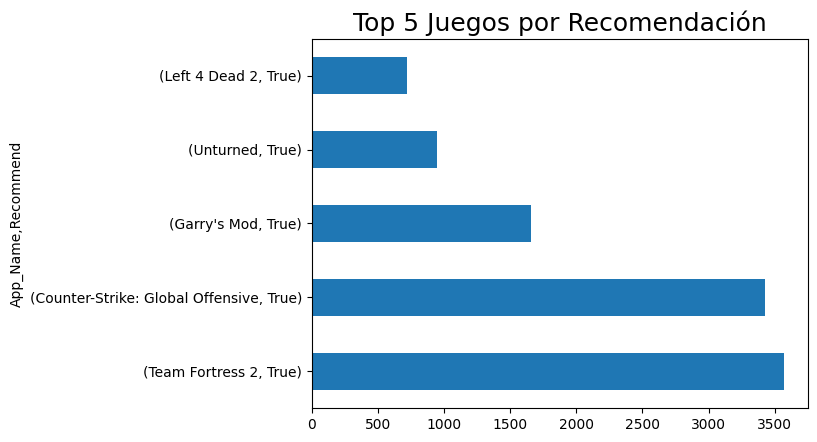

In [25]:
#Ahora procederemos a graficar el top 5 juegos mas recomendados
games_reviews.groupby("App_Name")["Recommend"].value_counts().sort_values(ascending = False).head(5).plot.barh().set_title("Top 5 Juegos por Recomendación", fontsize = 18)


Se puede observar que existe una gran brecha entre el primer puesto y los demas. Se puede afirmar que el mejor desarrolador es Valve
Es el mejor desarrollador por lejos. Los demas desarrolladores tienen un valor similar. Lo que significa que son normales pero no los mejores


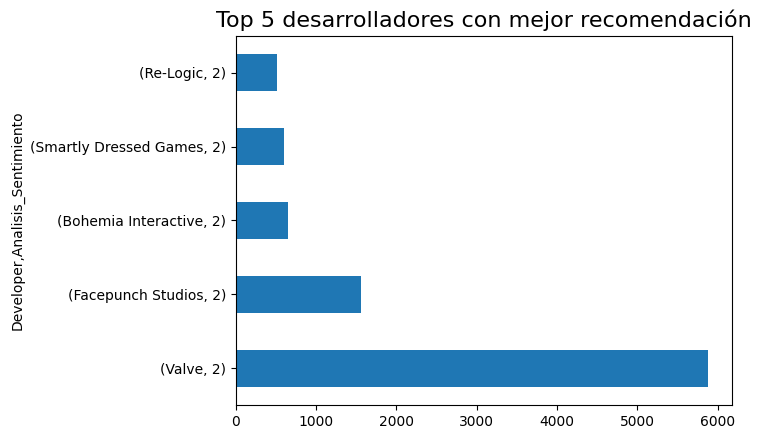

In [26]:
#Ahora se graficara el top 5 de los desarrolladores mas recomendados
dev_top_5 = games_reviews[games_reviews.Analisis_Sentimiento == 2]
dev_top_5 .groupby('Developer')['Analisis_Sentimiento'].value_counts().sort_values(ascending=False).head(5).plot.barh().set_title("Top 5 desarrolladores con mejor recomendación", fontsize = 16)
print(f"Se puede observar que existe una gran brecha entre el primer puesto y los demas. Se puede afirmar que el mejor desarrolador es Valve")
print("Es el mejor desarrollador por lejos. Los demas desarrolladores tienen un valor similar. Lo que significa que son normales pero no los mejores")

      

Ahora haremos una nube de palabras para entender mejor las reseñas de los usuarios


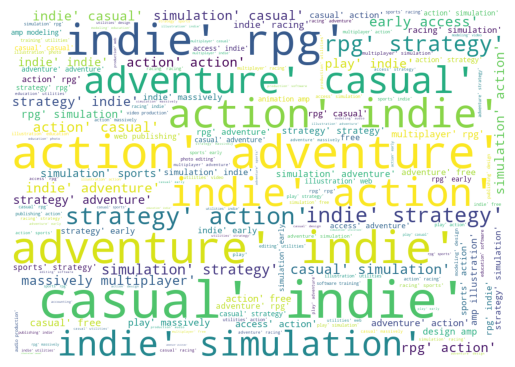

In [27]:
#Nube de palabras
games_nube = games.copy() #Generamos una copia
games_nube['Genres'] = games_nube['Genres'].astype(str)#Convertimos a string los datos del a columna Genres
texto = ' '.join(games_nube['Genres'])
# Ahora procedemos a normalizar las palabras
texto = texto.lower()

def special_ch(texto):
    return re.sub(r'[^a-zA-Z0-9\s]', '', texto)
text = special_ch(texto)

Word_Cloud = WordCloud(width=1000, height=700,  background_color='white').generate(texto)
plt.imshow(Word_Cloud)
plt.axis('off')
plt.show()

C:\Users\Cristian\AppData\Local\Temp\ipykernel_7280\2817721027.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Developer', y='Analisis_Sentimiento', data = Best_dev, palette='viridis')


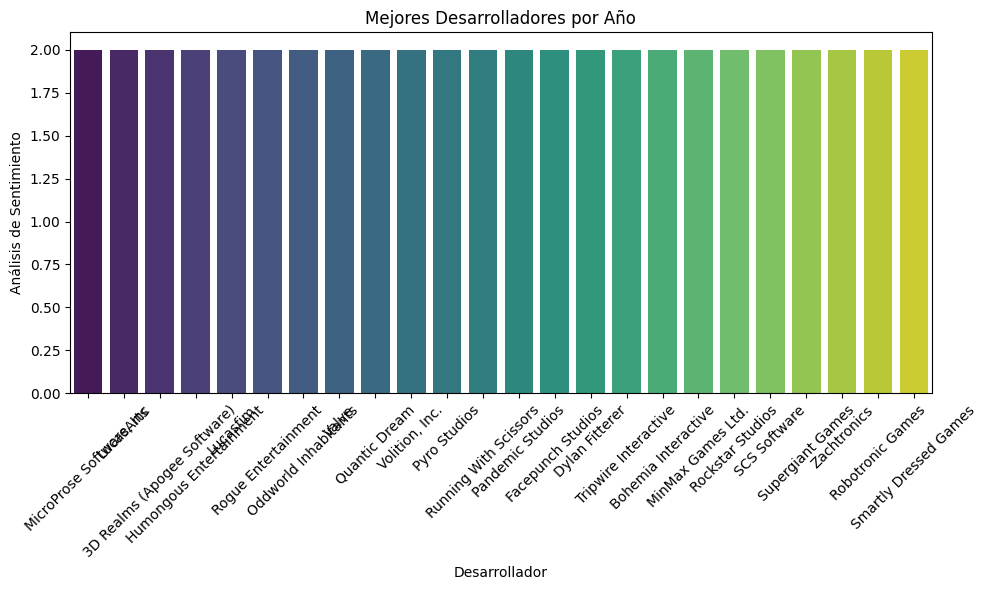

In [28]:
Best_dev = games_reviews.sort_values(by=['Year', 'Analisis_Sentimiento'], ascending=[True, False]) \
                        .groupby('Year') \
                        .head(1) \
                        .reset_index(drop=True)
# Graficamos
plt.figure(figsize=(10, 6))
sns.barplot(x='Developer', y='Analisis_Sentimiento', data = Best_dev, palette='viridis')
for index, row in Best_dev.iterrows():
    bar_plot.text(index, row['Analisis_Sentimiento'] + 0.02, str(row['Year']), 
                  color='black', ha='center', va='bottom')
plt.title('Mejores Desarrolladores por Año')
plt.xlabel('Desarrollador')
plt.ylabel('Análisis de Sentimiento')
plt.xticks(rotation=45)  


plt.tight_layout()
plt.show()


C:\Users\Cristian\AppData\Local\Temp\ipykernel_7280\218281366.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Desarrollador y Recomendación', bbox_to_anchor=(1.05, 1), loc='upper left')


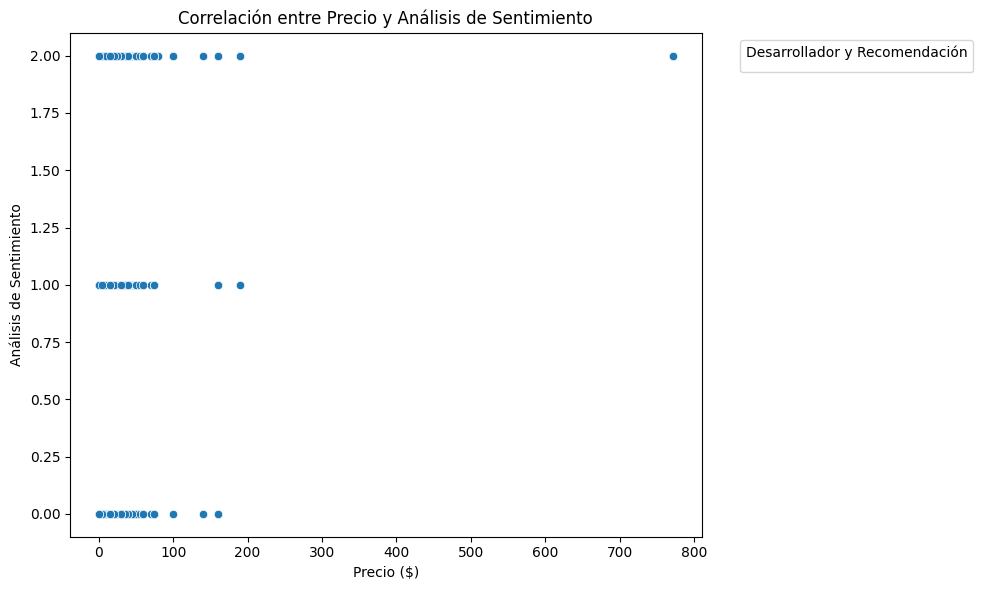

Se puede afirmar que el precio no influye en la aceptación del videojuego
Ya que los precios para videojuegos con un sentimiento positivo y negativo son los mismos. Es decir, hay videojuegos con precios similares pero con distinto valor de sentimiento por parte de los usuarios
Cabe resaltar que existe un videojuego con un precio realmente alto (aprox. 780$) y tiene un sentimiento positivo por parte del usuario


In [29]:
#Ahora graficaremos un grafico de dispersion para ver la correlacion entre las variables precio y analisis de sentimiento
#games_reviews.head(2)
plt.figure(figsize=(10,6))
sns.scatterplot(x ="Price", y = "Analisis_Sentimiento", data = games_reviews)
plt.title('Correlación entre Precio y Análisis de Sentimiento')
plt.xlabel('Precio ($)')
plt.ylabel('Análisis de Sentimiento')
plt.legend(title='Desarrollador y Recomendación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.show()
print("Se puede afirmar que el precio no influye en la aceptación del videojuego")
print("Ya que los precios para videojuegos con un sentimiento positivo y negativo son los mismos. Es decir, hay videojuegos con precios similares pero con distinto valor de sentimiento por parte de los usuarios")
print("Cabe resaltar que existe un videojuego con un precio realmente alto (aprox. 780$) y tiene un sentimiento positivo por parte del usuario")

In [30]:
#los valores de la columna user id y steam id son similares. Vamos a ver si son los mismos
items['user_equals_item'] = items['user_id'] == items['steam_id']
items["user_equals_item"].value_counts() #No son los mismos


user_equals_item
False    2914506
True     2179576
Name: count, dtype: int64

In [31]:
items.drop(columns=["user_equals_item"], inplace=True)
items.head(2)

,user_id,items_count,steam_id,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,10,Counter-Strike,6.0,0.0
1,76561197970982479,277,76561197970982479,20,Team Fortress Classic,0.0,0.0


C:\Users\Cristian\AppData\Local\Temp\ipykernel_7280\3799990788.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='playtime_forever', y='item_name', data=playtime_by_game.head(10), palette='viridis')


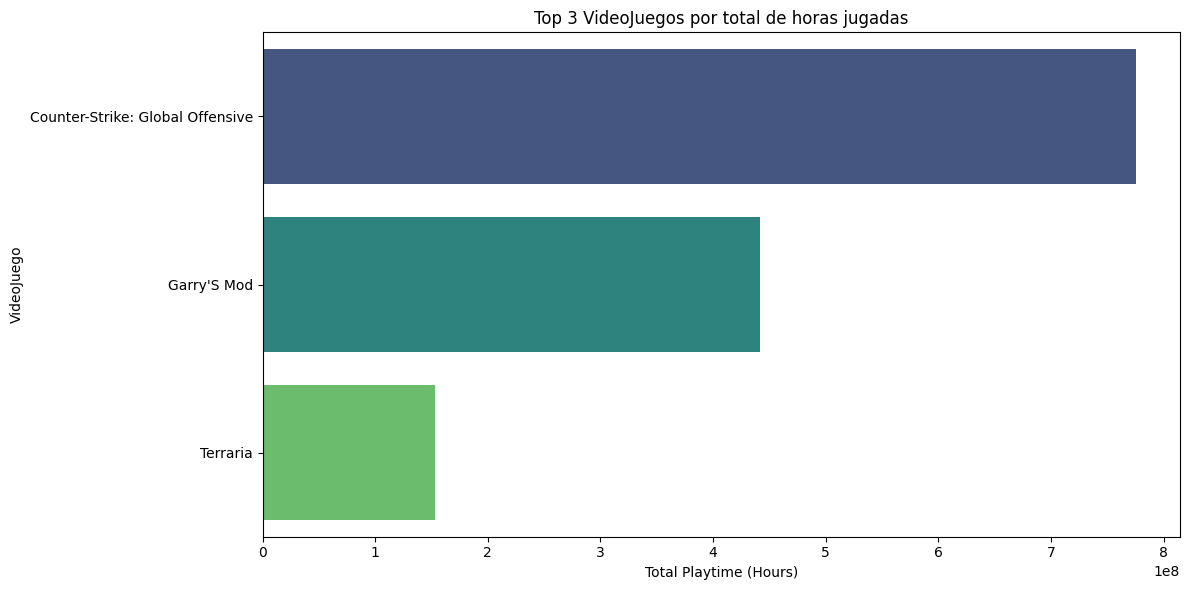

In [32]:
#Videojuegos mas jugados
playtime_by_game = items.groupby('item_name', as_index=False)['playtime_forever'].sum().sort_values(by='playtime_forever', ascending=False).head(3)
plt.figure(figsize=(12, 6))
sns.barplot(x='playtime_forever', y='item_name', data=playtime_by_game.head(10), palette='viridis')
plt.xlabel('Total Playtime (Hours)')
plt.ylabel('VideoJuego')
plt.title('Top 3 VideoJuegos por total de horas jugadas')
plt.tight_layout()

plt.show()

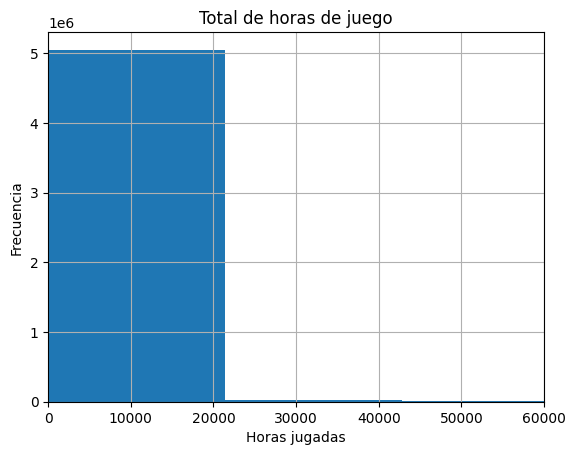

Se puede afirmar que la gran mayoría de los jugadores tienen un umbral de horas jugadas de hasta 15 mil horas por item


In [33]:
# Total de hras jugadas
items['playtime_forever'].hist(bins=30)
plt.xlim(0, 60000)
plt.title('Total de horas de juego')
plt.xlabel("Horas jugadas")
plt.ylabel('Frecuencia')
plt.show()
print("Se puede afirmar que la gran mayoría de los jugadores tienen un umbral de horas jugadas de hasta 15 mil horas por item")

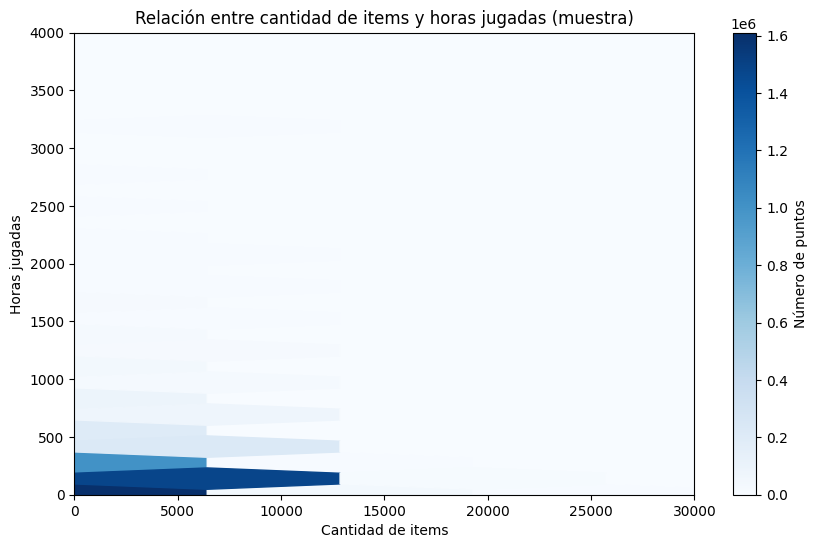

Se puede inferir que la mayoría de los usuarios tienden a jugar menos y a tener menos ítems en comparación con aquellos que tienen una cantidad significativa de ítems y horas jugadas. 


In [44]:
#Gráfico para ver relación entre horas jugadas y número de items


plt.figure(figsize=(10, 6))
plt.hexbin(items['playtime_forever'], items['items_count'], gridsize=50, cmap='Blues')
plt.colorbar(label='Número de puntos')
plt.title('Relación entre cantidad de items y horas jugadas (muestra)')
plt.xlabel('Cantidad de items')
plt.ylabel('Horas jugadas')
plt.ylim(0,4000)
plt.xlim(0,30000)
plt.show()
print("Se puede inferir que la mayoría de los usuarios tienden a jugar menos y a tener menos ítems en comparación con aquellos que tienen una cantidad significativa de ítems y horas jugadas. ")
